In [1]:
import yfinance as yf
adani=yf.download("ADANIENT.NS", start='2016-01-01', end='2019-12-31',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [2]:
data=adani.copy()

In [3]:
data[ : ]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-01-01   45.553741   49.422543   44.872616   49.095600   47.590431   
2016-01-04   48.768658   50.158157   45.907928   46.371094   44.949451   
2016-01-05   46.670792   48.823151   45.880684   48.278248   46.798138   
2016-01-06   47.951309   48.468964   46.480076   46.997730   45.556877   
2016-01-07   46.262115   46.262115   42.502296   43.564854   42.229248   
...                ...         ...         ...         ...         ...   
2019-12-23  217.750000  220.800003  212.399994  214.550003  212.653931   
2019-12-24  214.550003  216.949997  207.600006  209.149994  207.301636   
2019-12-26  208.949997  211.100006  205.600006  208.949997  207.103409   
2019-12-27  209.050003  211.199997  207.100006  209.100006  207.252090   
2019-12-30  209.899994  211.600006  208.000000  208.649994  206.806046   

              Volume  
Date                  
2016-01-01  10963906  
2016-01-04   9408965  
2016-01-05   9801814  
2016-01-06   7093448  
2016-01-07   8919023  
...              ...  
2019-12-23   3709426  
2019-12-24   2984621  
2019-12-26   3299177  
2019-12-27   2240503  
2019-12-30   1938731  

[982 rows x 6 columns]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import math

In [5]:
cf.set_config_file(offline=True)

In [6]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

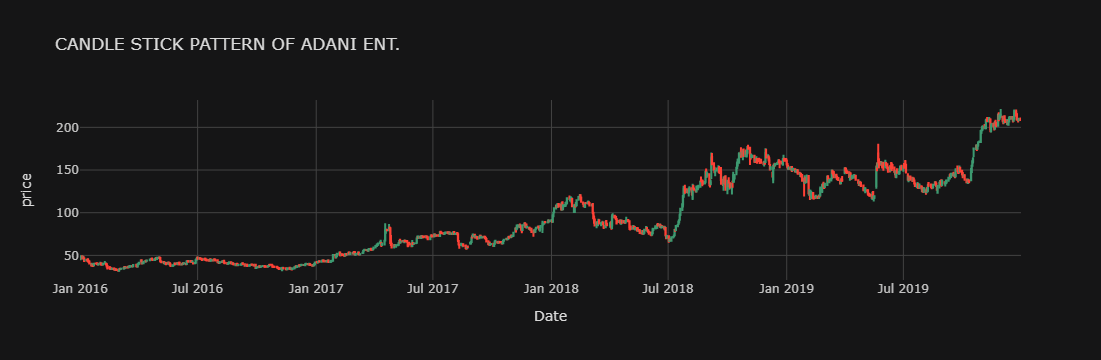

In [7]:
# Here I am plotting graph of the stock price over the time frame which I have choosen
data.iplot(theme = "solar" , title="CANDLE STICK PATTERN OF ADANI ENT.",xTitle="Date", yTitle="price",kind="candle")


# SMA CROSSOVERS 

In [8]:
# Here I have done Calculation for SMA
data_sma = data[['Close']].copy()
short_sma_values = []
short_window_size = 50

for i in range(len(data) - short_window_size + 1):
    sma = sum(data_sma['Close'][i:i + short_window_size]) / short_window_size
    short_sma_values.append(sma)

data_sma['SHORT SMA'] = [None] * (short_window_size - 1) + short_sma_values



In [9]:
data_sma

Close   SHORT SMA
Date                              
2016-01-01   49.095600         NaN
2016-01-04   46.371094         NaN
2016-01-05   48.278248         NaN
2016-01-06   46.997730         NaN
2016-01-07   43.564854         NaN
...                ...         ...
2019-12-23  214.550003  198.187999
2019-12-24  209.149994  199.631999
2019-12-26  208.949997  200.868999
2019-12-27  209.100006  201.950999
2019-12-30  208.649994  202.920999

[982 rows x 2 columns]

In [10]:
long_sma_values = []
long_window_size = 200

for i in range(len(data) - long_window_size + 1):
    sma = sum(data_sma['Close'][i:i + long_window_size]) / long_window_size
    long_sma_values.append(sma)

data_sma['LONG SMA'] = [None] * (long_window_size - 1) + long_sma_values

In [11]:
data_sma

Close   SHORT SMA   LONG SMA
Date                                         
2016-01-01   49.095600         NaN        NaN
2016-01-04   46.371094         NaN        NaN
2016-01-05   48.278248         NaN        NaN
2016-01-06   46.997730         NaN        NaN
2016-01-07   43.564854         NaN        NaN
...                ...         ...        ...
2019-12-23  214.550003  198.187999  154.66875
2019-12-24  209.149994  199.631999  155.05450
2019-12-26  208.949997  200.868999  155.43875
2019-12-27  209.100006  201.950999  155.82300
2019-12-30  208.649994  202.920999  156.22200

[982 rows x 3 columns]

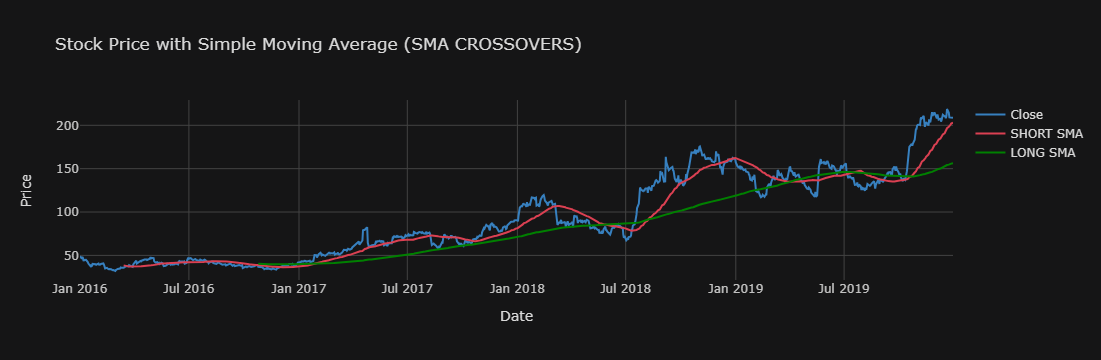

In [12]:
# Here I am plotting graphs for SMA of window size 50 AND 200
data_sma.iplot(xTitle='Date', yTitle='Price', title='Stock Price with Simple Moving Average (SMA CROSSOVERS)',
              width=2, colors=['blue', 'red', 'green'], theme='solar')

In [13]:
position_sma=np.where(data_sma['SHORT SMA']>data_sma['LONG SMA'],1,-1 )
data_sma['POSITION']=position_sma

In [14]:
data_sma

Close   SHORT SMA   LONG SMA  POSITION
Date                                                   
2016-01-01   49.095600         NaN        NaN        -1
2016-01-04   46.371094         NaN        NaN        -1
2016-01-05   48.278248         NaN        NaN        -1
2016-01-06   46.997730         NaN        NaN        -1
2016-01-07   43.564854         NaN        NaN        -1
...                ...         ...        ...       ...
2019-12-23  214.550003  198.187999  154.66875         1
2019-12-24  209.149994  199.631999  155.05450         1
2019-12-26  208.949997  200.868999  155.43875         1
2019-12-27  209.100006  201.950999  155.82300         1
2019-12-30  208.649994  202.920999  156.22200         1

[982 rows x 4 columns]

####  A DEATH CROSS occurs when the 50-day SMA crosses below the 200-day SMA sign of a strong bearish trend 
#### A GOLDEN CROSS occurs when the 50-day SMA crosses above the 200-day SMA sign of a strong bullish trend 



# EMA CROSSOVERS

In [15]:
# Here I have done Calculation for EMA
data_ema = data[['Close']].copy()
ema_valuesshort = [data_ema.iloc[0, 0]]  

period = short_window_size 
multiplier = 2 / (period + 1)
for i in range(1, len(data_ema)):
    ema_today = (data_ema.iloc[i, 0] - ema_valuesshort[i - 1]) * multiplier + ema_valuesshort[i - 1]
    ema_valuesshort.append(ema_today)

data_ema['Short EMA values '] = ema_valuesshort


ema_valueslong = [data_ema.iloc[0, 0]]  

period = long_window_size 
multiplier = 2 / (period + 1)
for i in range(1, len(data_ema)):
    ema_today = (data_ema.iloc[i, 0] - ema_valueslong[i - 1]) * multiplier + ema_valueslong[i - 1]
    ema_valueslong.append(ema_today)

data_ema['Long EMA values '] = ema_valueslong
print(data_ema)

                 Close  Short EMA values   Long EMA values 
Date                                                       
2016-01-01   49.095600          49.095600         49.095600
2016-01-04   46.371094          48.988757         49.068491
2016-01-05   48.278248          48.960894         49.060627
2016-01-06   46.997730          48.883907         49.040101
2016-01-07   43.564854          48.675317         48.985621
...                ...                ...               ...
2019-12-23  214.550003         196.409803        162.520889
2019-12-24  209.149994         196.909418        162.984860
2019-12-26  208.949997         197.381598        163.442225
2019-12-27  209.100006         197.841143        163.896531
2019-12-30  208.649994         198.265020        164.341839

[982 rows x 3 columns]


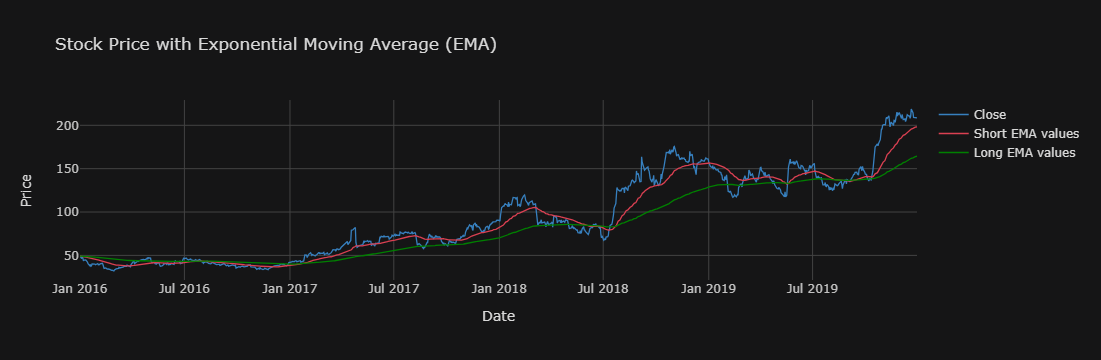

In [16]:
# Here I am plotting graphs for EMA
data_ema.iplot(title='Stock Price with Exponential Moving Average (EMA)', xTitle='Date', yTitle='Price',color=['blue','red','green'],theme='solar')



# MACD

In [17]:
# Here I have done calculation for MACD
data_macd = data[['Close']].copy()
# choosing the standard value for the window size
short_window = 12  # Short-term EMA window
long_window = 26 # Long-term EMA window
signal_window = 9  # Signal line window

short_ema = [data_macd.iloc[0, 0]]  
period = short_window
multiplier = 2 / (period + 1)
for i in range(1, len(data_macd)):
    ema_today = (data_macd.iloc[i, 0] - short_ema[i - 1]) * multiplier + short_ema[i - 1]
    short_ema.append(ema_today)
short_ema=np.array(short_ema)


long_ema = [data_macd.iloc[0, 0]]  
period = long_window 
multiplier = 2 / (period + 1)
for i in range(1, len(data_macd)):
    ema_today = (data_macd.iloc[i, 0] - long_ema[i - 1]) * multiplier + long_ema[i - 1]
    long_ema.append(ema_today)
long_ema=np.array(long_ema)    
macd_line = short_ema - long_ema
macd_line=np.array(macd_line)
data_macd['MACD LINE'] = macd_line


signal_line = [data_macd.iloc[0, 1]]
period = signal_window 
multiplier = 2 / (period + 1)
for i in range(1, len(data_ema)):
    ema_today = (data_macd.iloc[i, 1] - macd_line[i - 1]) * multiplier + macd_line[i - 1]
    signal_line.append(ema_today)
signal_line=np.array(signal_line)

data_macd['SIGNAL LINE'] = signal_line

histogram = macd_line - signal_line

data_macd['HISTOGRAM'] = histogram


In [18]:
position_macd=np.where(data_macd['MACD LINE']>data_macd['SIGNAL LINE'],1,-1)
data_macd['position macd']=position_macd

In [19]:
data_macd

Close  MACD LINE  SIGNAL LINE  HISTOGRAM  position macd
Date                                                                    
2016-01-01   49.095600   0.000000     0.000000   0.000000             -1
2016-01-04   46.371094  -0.217340    -0.043468  -0.173872             -1
2016-01-05   48.278248  -0.233005    -0.220473  -0.012533             -1
2016-01-06   46.997730  -0.344773    -0.255359  -0.089414             -1
2016-01-07   43.564854  -0.702260    -0.416271  -0.285989             -1
...                ...        ...          ...        ...            ...
2019-12-23  214.550003   4.169791     4.175954  -0.006163             -1
2019-12-24  209.149994   3.685466     4.072926  -0.387459             -1
2019-12-26  208.949997   3.248056     3.597984  -0.349928             -1
2019-12-27  209.100006   2.880308     3.174507  -0.294199             -1
2019-12-30  208.649994   2.523463     2.808939  -0.285476             -1

[982 rows x 5 columns]

In [20]:
dataframe_macd=data_macd[['MACD LINE','SIGNAL LINE','HISTOGRAM']] 

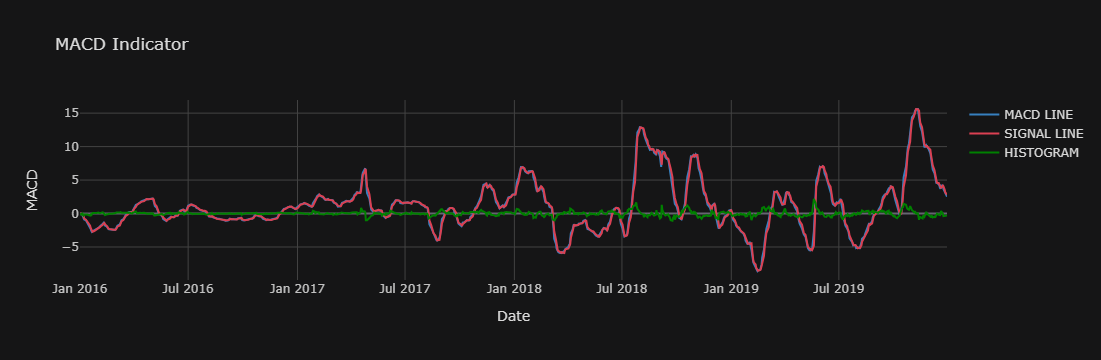

In [21]:
# Here I am plotting graphs for EMA
dataframe_macd.iplot(xTitle='Date', yTitle='MACD', title='MACD Indicator', width=2, colors=['blue', 'red', 'green'],
             mode='lines', theme='solar')

# BOLLINGER BANDS

In [22]:
data_bb=data[['Close']].copy()
# Here I am calculating bollinger band  
window= 20
middle_band=data_bb[['Close']].rolling(window).mean()
standard_deviation=data_bb[['Close']].rolling(window).std()
upper_band=middle_band-2*(standard_deviation)
lower_band=middle_band+2*(standard_deviation)
distance=data_bb-middle_band

In [23]:
data_bb.dropna(inplace=True) #dropping the intial rows which don't have values


In [24]:
position=np.where(data_bb<lower_band,1,np.nan)
#oversold condition :buy

In [25]:
position=np.where(data_bb>upper_band,-1,position)
# overbrought condition :sell

In [26]:
position=np.where(distance*distance.shift(1)<0,0,position)
# crossing middle band :hold

In [27]:
position= pd.DataFrame(position)
position=position.ffill().fillna(0)
position=np.array(position)


In [28]:
data_bb['MIDDLE BAND'] = middle_band
data_bb['UPPER BAND'] = upper_band
data_bb['LOWER BAND'] = lower_band

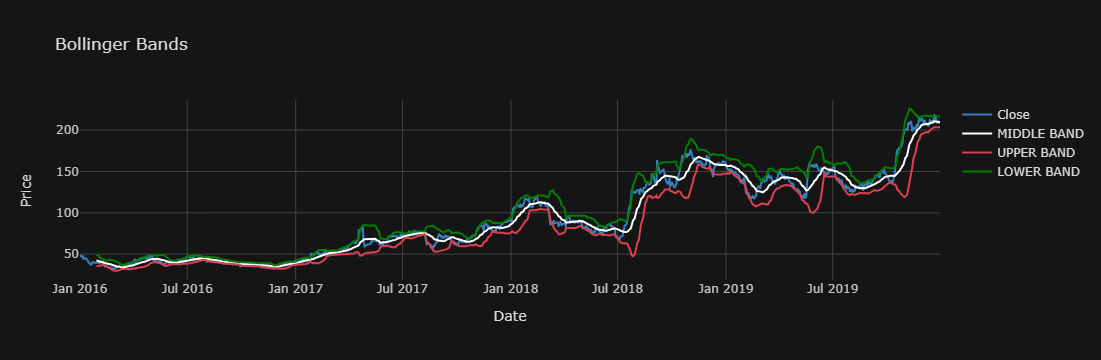

In [29]:
# Here I am plotting graphs for Bollinger Bands

data_bb.iplot(xTitle='Date', yTitle='Price', title='Bollinger Bands', width=2, colors=['blue', 'white', 'red', 'green'],
               mode='lines', theme='solar')

In [30]:
data_bb['DISTANCE'] = distance
data_bb['POSITION'] = position


In [31]:
data_bb


Close  MIDDLE BAND  UPPER BAND  LOWER BAND  DISTANCE  \
Date                                                                    
2016-01-01   49.095600          NaN         NaN         NaN       NaN   
2016-01-04   46.371094          NaN         NaN         NaN       NaN   
2016-01-05   48.278248          NaN         NaN         NaN       NaN   
2016-01-06   46.997730          NaN         NaN         NaN       NaN   
2016-01-07   43.564854          NaN         NaN         NaN       NaN   
...                ...          ...         ...         ...       ...   
2019-12-23  214.550003   210.524999  203.550947  217.499052  4.025004   
2019-12-24  209.149994   210.452499  203.451633  217.453364 -1.302505   
2019-12-26  208.949997   210.222498  203.349017  217.095980 -1.272501   
2019-12-27  209.100006   210.022498  203.269838  216.775158 -0.922492   
2019-12-30  208.649994   209.709998  203.340116  216.079881 -1.060004   

            POSITION  
Date                  
2016-01-01       0.0  
2016-01-04       0.0  
2016-01-05       0.0  
2016-01-06       0.0  
2016-01-07       0.0  
...              ...  
2019-12-23      -1.0  
2019-12-24       0.0  
2019-12-26      -1.0  
2019-12-27      -1.0  
2019-12-30      -1.0  

[982 rows x 6 columns]

# STOCHASTIC OSCILLATOR

In [32]:
data_so=data[['Close']].copy()
period =14 # choosing standard value 
roll_low=data['Low'].rolling(period).min()
roll_high=data['High'].rolling(period).max()
k=(data['Close']-data['Low'])/(data['High']-data['Low'])*(100)
moving_avg=3 # standard value
d=k.rolling(moving_avg).mean()


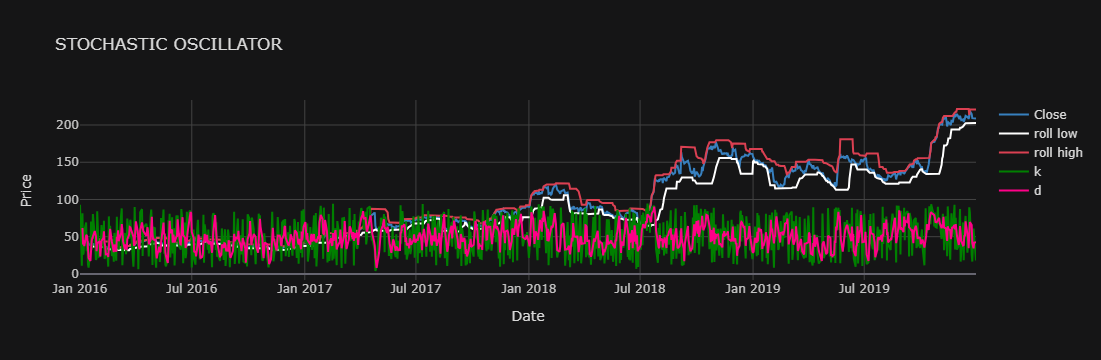

In [33]:

data_so['roll low']=roll_low
data_so['roll high' ]= roll_high
data_so['k']=k
data_so['d']=d
data_so.iplot(xTitle='Date', yTitle='Price', title='STOCHASTIC OSCILLATOR', width=2, colors=['blue', 'white','red', 'green','pink'],
               mode='lines', theme='solar')

In [34]:
position_so=np.where(data_so['k']>data_so['d'],1,-1)
data_so['position so']=position_so

In [35]:
data_so

Close    roll low   roll high          k          d  \
Date                                                                   
2016-01-01   49.095600         NaN         NaN  92.814336        NaN   
2016-01-04   46.371094         NaN         NaN  10.897420        NaN   
2016-01-05   48.278248         NaN         NaN  81.481429  61.731062   
2016-01-06   46.997730         NaN         NaN  26.027332  39.468727   
2016-01-07   43.564854         NaN         NaN  28.260861  45.256540   
...                ...         ...         ...        ...        ...   
2019-12-23  214.550003  202.399994  220.800003  25.595319  65.769348   
2019-12-24  209.149994  202.399994  220.800003  16.577426  41.491212   
2019-12-26  208.949997  202.399994  220.800003  60.908924  34.360556   
2019-12-27  209.100006  202.399994  220.800003  48.780597  42.088982   
2019-12-30  208.649994  202.649994  220.800003  18.055355  42.581626   

            position so  
Date                     
2016-01-01           -1  
2016-01-04           -1  
2016-01-05            1  
2016-01-06           -1  
2016-01-07           -1  
...                 ...  
2019-12-23           -1  
2019-12-24           -1  
2019-12-26            1  
2019-12-27            1  
2019-12-30           -1  

[982 rows x 6 columns]

# COMBINING STOCHASTIC OSCILLATOR AND MACD


In [36]:
def combine_indicators(data_so, data_macd):
    signals = []
    position = 0  
    
    for i in range(len(data_so)):
        so_position = data_so['position so'][i]
        macd_position = data_macd['position macd'][i]
        
        if so_position == 1 and macd_position == 1: 
            position = 1
            signals.append('1')
        elif so_position == -1 and macd_position == -1: 
            position = -1
            signals.append('-1')
        else:  # hold signal
            signals.append('0')
    
    return signals


In [37]:
signals = combine_indicators(data_so, data_macd)
data_so['signals'] = signals


C:\Users\Krishna\AppData\Local\Temp\ipykernel_11604\4091427517.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Krishna\AppData\Local\Temp\ipykernel_11604\4091427517.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [38]:
data_so['signals']

Date
2016-01-01    -1
2016-01-04    -1
2016-01-05     0
2016-01-06    -1
2016-01-07    -1
              ..
2019-12-23    -1
2019-12-24    -1
2019-12-26     0
2019-12-27     0
2019-12-30    -1
Name: signals, Length: 982, dtype: object

#### this combination is telling that should i buy sell or hold

In [39]:
data_frame=data[['Close']].copy()
data_frame['LSMA']=data_sma['LONG SMA'].copy()
data_frame['SSMA']=data_sma['SHORT SMA'].copy()
data_frame['LEMA']=data_ema['Long EMA values '].copy()
data_frame['SEMA']=data_ema['Short EMA values '].copy()
data_frame['MACDLINE']=data_macd['MACD LINE'].copy()
data_frame['SIGNALLINE']=data_macd['SIGNAL LINE'].copy()
data_frame['K']=data_so['k'].copy()
data_frame['D']=data_so['d'].copy()
data_frame['BBMIDDLE']=data_bb['MIDDLE BAND'].copy()
data_frame['BBUPPER']=data_bb['UPPER BAND'].copy()
data_frame['BBLOWER']=data_bb['LOWER BAND'].copy()



In [40]:
data_frame

Close       LSMA        SSMA        LEMA        SEMA  \
Date                                                                    
2016-01-01   49.095600        NaN         NaN   49.095600   49.095600   
2016-01-04   46.371094        NaN         NaN   49.068491   48.988757   
2016-01-05   48.278248        NaN         NaN   49.060627   48.960894   
2016-01-06   46.997730        NaN         NaN   49.040101   48.883907   
2016-01-07   43.564854        NaN         NaN   48.985621   48.675317   
...                ...        ...         ...         ...         ...   
2019-12-23  214.550003  154.66875  198.187999  162.520889  196.409803   
2019-12-24  209.149994  155.05450  199.631999  162.984860  196.909418   
2019-12-26  208.949997  155.43875  200.868999  163.442225  197.381598   
2019-12-27  209.100006  155.82300  201.950999  163.896531  197.841143   
2019-12-30  208.649994  156.22200  202.920999  164.341839  198.265020   

            MACDLINE  SIGNALLINE          K          D    BBMIDDLE  \
Date                                                                 
2016-01-01  0.000000    0.000000  92.814336        NaN         NaN   
2016-01-04 -0.217340   -0.043468  10.897420        NaN         NaN   
2016-01-05 -0.233005   -0.220473  81.481429  61.731062         NaN   
2016-01-06 -0.344773   -0.255359  26.027332  39.468727         NaN   
2016-01-07 -0.702260   -0.416271  28.260861  45.256540         NaN   
...              ...         ...        ...        ...         ...   
2019-12-23  4.169791    4.175954  25.595319  65.769348  210.524999   
2019-12-24  3.685466    4.072926  16.577426  41.491212  210.452499   
2019-12-26  3.248056    3.597984  60.908924  34.360556  210.222498   
2019-12-27  2.880308    3.174507  48.780597  42.088982  210.022498   
2019-12-30  2.523463    2.808939  18.055355  42.581626  209.709998   

               BBUPPER     BBLOWER  
Date                                
2016-01-01         NaN         NaN  
2016-01-04         NaN         NaN  
2016-01-05         NaN         NaN  
2016-01-06         NaN         NaN  
2016-01-07         NaN         NaN  
...                ...         ...  
2019-12-23  203.550947  217.499052  
2019-12-24  203.451633  217.453364  
2019-12-26  203.349017  217.095980  
2019-12-27  203.269838  216.775158  
2019-12-30  203.340116  216.079881  

[982 rows x 12 columns]

In [41]:
data_frame['Signal'] = 'Hold'  
buy_condition = (data_frame['SSMA'] > data_frame['LSMA']) & \
                (data_frame['SEMA'] > data_frame['LEMA']) & \
                (data_frame['MACDLINE'] > data_frame['SIGNALLINE']) & \
                (data_frame['K'] > data_frame['D'])

sell_condition = (data_frame['SSMA'] < data_frame['LSMA']) & \
                 (data_frame['SEMA'] < data_frame['LEMA']) & \
                 (data_frame['MACDLINE'] < data_frame['SIGNALLINE']) & \
                 (data_frame['K'] < data_frame['D'])

data_frame.loc[buy_condition, 'Signal'] = 'Buy'
data_frame.loc[sell_condition, 'Signal'] = 'Sell'

In [42]:
data_frame['Signal']

Date
2016-01-01    Hold
2016-01-04    Hold
2016-01-05    Hold
2016-01-06    Hold
2016-01-07    Hold
              ... 
2019-12-23    Hold
2019-12-24    Hold
2019-12-26    Hold
2019-12-27    Hold
2019-12-30    Hold
Name: Signal, Length: 982, dtype: object

In [43]:
data_frame = data_frame.dropna()

In [44]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [45]:
X = data_frame.drop(columns=['Signal']).values
y = data_frame['Signal'].values

In [46]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [47]:
# One-hot encode target labels
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(categories='auto')
y_encoded = label_encoder.fit_transform(y)
y_encoded = one_hot_encoder.fit_transform(y_encoded.reshape(-1, 1)).toarray()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [49]:
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

In [50]:
np.random.seed(1)
W = np.random.randn(X_train.shape[1], y_train.shape[1])
b = np.zeros((1, y_train.shape[1]))


In [51]:
def forward_propagation(X, W, b):
    return softmax(np.dot(X, W) + b)

In [52]:
learning_rate = 0.01
epochs = 1000
for epoch in range(epochs):
    y_pred = forward_propagation(X_train, W, b)
    grad = y_pred - y_train
    W -= learning_rate * np.dot(X_train.T, grad)
    b -= learning_rate * np.sum(grad, axis=0, keepdims=True)

In [53]:
y_pred_test = forward_propagation(X_test, W, b)
accuracy = np.mean(np.argmax(y_pred_test, axis=1) == np.argmax(y_test, axis=1)) * 100

In [54]:
print(f"Accuracy: {accuracy}%")

Accuracy: 83.40425531914893%


In [55]:
from sklearn.metrics import roc_auc_score, f1_score

In [56]:
auc_roc_score = roc_auc_score(y_test, y_pred_test, multi_class='ovr')*100

In [57]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred_test, axis=1), average='weighted')*100

In [58]:
print(f"AUC-ROC Score: {auc_roc_score}%")
print(f"F1 Score: {f1}%")

AUC-ROC Score: 81.067838923377%
F1 Score: 80.03805739975954%
